# Software

We currently support two major pieces of software, SLEEPY and pyDIFRATE

## SLEEPY
<img src="https://raw.githubusercontent.com/alsinmr/SLEEPY/dd8f587413c86eb8504ed45c71c70060a4eca70e/logo.png" alt="SLEEPY" width="350">

SLEEPY (Spins in Liouville-space for rElaxation and Exchange in PYthon) is a general purpose NMR-simulation software which simplifies simulations that include relaxation and exchange processes while allowing arbitrary pulse sequences in the rotating and lab frames.

For example, below we calculate $R_{1\rho}$ relaxation in just a few lines of code. Check out the full tutorial at
[http://sleepy-nmr.org](http://sleepy-nmr.org)

In [1]:
import os
os.chdir('../../')

State-space reduction: 32->16


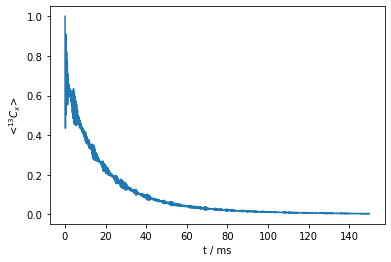

In [3]:
import SLEEPY as sl

ex0=sl.ExpSys(v0H=600,Nucs=['13C','1H'],vr=10000)
ex1=ex0.copy()
ex0.set_inter('dipole',i0=0,i1=1,delta=44000)
ex1.set_inter('dipole',i0=0,i1=1,delta=44000,euler_d=[0,30,0])

L=sl.Liouvillian(ex0,ex1,kex=sl.Tools.twoSite_kex(tc=1e-7))
seq=L.Sequence().add_channel('13C',v1=25000) #Defaults to 1 rotor period

rho=sl.Rho('13Cx','13Cx')
rho.DetProp(seq,n=1500) #100 ms
_=rho.plot()

## pyDIFRATE
<img src="https://raw.githubusercontent.com/alsinmr/pyDR_tutorial/refs/heads/main/JupyterBook/logo.png" alt="pyDR" width="500">

pyDIFRATE is software for analysis of NMR relaxation data together with MD data. It is based on the "detectors" concept, which views each NMR relaxation rate measurement as a timescale-specific window into the motion. Multiple experiments can then be combined to yield optimized windows. 

MD-derived correlation functions may also be analyzed with detectors, where the optimized windows may be set to approximate the experimental windows, allowing quantitative comparison between experimental and simulation results. This is then supplemented with various analysis tools for MD simulation, including frame analysis to separate types of motion and cross-correlation analysis to connect motions between pairs of bonds.

For example, below we calculate sensitivities of solution-state NMR experiments, and optimize detectors. Sensitivities of an MD-derived correlation function are then optimized to match the experimentally-derived detectors. Check out the full tutorial [here](https://alsinmr.github.io/pyDR).

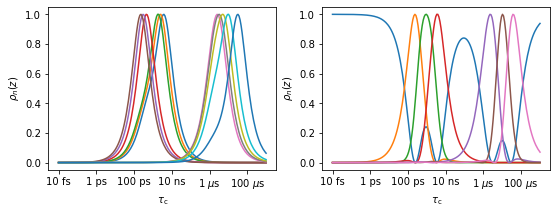

In [26]:
import pyDR
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots(1,2,figsize=[9,3])
nmr=pyDR.Sens.NMR(Type='R1',Nuc='15N',v0=[400,600,800])
nmr.new_exper(Type='NOE',Nuc='15N',v0=[400,600,800])
nmr.new_exper(Type='R1p',Nuc='15N',v0=600,v1=[15,25,35,45,55],vr=60)

nmr.plot_rhoz(ax=ax[0],norm=True)

r=nmr.Detector()
r.r_auto(6).inclS2()
_=r.plot_rhoz(ax=ax[1])

Above, we have optimized 7 detectors from 12 experiments (11 relaxation plus order parameter measurement). We may also generate sensitivies of an MD correlation function, and optimize these to match the above sensitivities. Using these detectors, we may analyze an MD simulation and compare the results to NMR data.

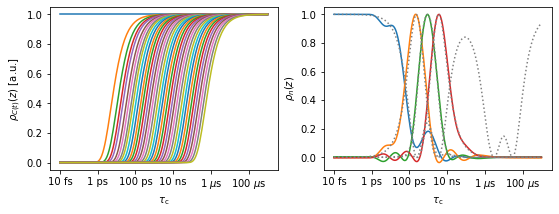

In [42]:
fig,ax=plt.subplots(1,2,figsize=[9,3])
md=pyDR.Sens.MD(t=np.arange(1e5)*.005)
_=md.plot_rhoz(ax=ax[0])

target=r.rhoz[:4]
target[0][100:]=0
r_md=md.Detector()
r_md.r_target(target,n=10)
r_md.plot_rhoz(ax=ax[1],index=range(len(target)),norm=True)
_=r.plot_rhoz(ax=ax[1],color='grey',linestyle=':',index=range(len(target)))